# Assignment 3

This assignment uses the weather data from Lab 1, from [https://github.com/fivethirtyeight/data/tree/master/us-weather-history](https://github.com/fivethirtyeight/data/tree/master/us-weather-history).  We used the KNYC.csv in Lab 1, and will also use KCLT.csv, which is the weather data for Charlotte, NC, in this assignment.

This assignment will look at different ways to predict the actual maximum daily temperature in New York using linear regression.  The actual maximum temperature was the maximum temperature recorded on that day.

1. Predicting the NYC actual max temperature from the NYC average max temperature:
    
    a. Use regplot from Seaborn to create a scatter plot of the average max temperature (on x axis) vs. the actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What is the equation for the linear model?  What proportion of the variance is explained by the model (R-squared)?
    
    c. Plot a histogram of the residuals of your model from part b.  Describe their distribution.  Based on this and your results from parts a and b, do you think this linear model is a good fit?  Why or why not?
    
2. Predicting the NYC actual max temperature from the Charlotte actual max temperature:
    Note:  To easily perform the following analysis, add the column of actual max temperatures from the Charlotte weather data to your NYC weather dataframe.  
    ex.  `nyc_weather_df["name_of_new_column"] = charlotte_weather_df["actual_max_temp"]`
    
    a. Use regplot from Seaborn to create a scatter plot of the Charlotte actual max temperature (on x axis) vs. the NYC actual max temperature (on y axis) with the regression line.  Do you think this data has a linear relationship?
    
    b. Compute the linear regression model where the independent variable is the average max temperature and the dependent variable is the actual max temperature.  What proportion of the variance is explained by the model?
    
    c. Predict the NYC actual max temperature if the Charlotte max temperature is 32F, 60F, and 80F.
    
    d. Plot a histogram of the residuals of your model from part b.  Describe their distribution.
    
    e. Make a scatter plot of the NYC actual max temperaturs (x axis) vs. the residuals from your linear model.  If you are using `plt.scatter()` you can add a horizontal line to your plot at 0 with the code `plt.axhline(0)`.  What do you notice about how the residuals are distributed above and below this line?  What tempertures will be overestimated by this model?  What temperatures will be underestimated by this model?
    
    f. Based on the previous parts, do you think this linear model is a good fit?
    
3. Predicting the NYC actual max temperature from both the average max temperature and the Charlotte actual max temperature:
    a. Compute a linear regression model with both the average max temperature and the Charlotte actual max temperature as the independent variables.  What proportion of variance is explained by this model?
    
    b. Plot a histogram of the residuals. Describe their distribution.
    
    c. Make a scatter plot of the NYC actual max temperatures (x axis) and the fitted NYC actual max temperatures (y axis).  What do you notice about the plot?

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline


In [4]:
dataNYC = pd.read_csv("KNYC.csv")
dataNYC.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,72,89,68,83,52,100,1943,1901,0.00,0.12,2.17
1,2014-7-2,82,72,91,68,83,56,100,2001,1966,0.96,0.13,1.79
2,2014-7-3,78,69,87,68,83,54,103,1933,1966,1.78,0.12,2.80
3,2014-7-4,70,65,74,68,84,55,102,1986,1949,0.14,0.13,1.76
4,2014-7-5,72,63,81,68,84,53,101,1979,1999,0.00,0.12,3.07


In [4]:
dataKCLT = pd.read_csv("KCLT.csv")
dataKCLT.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


NameError: name 'dataKCLT' is not defined

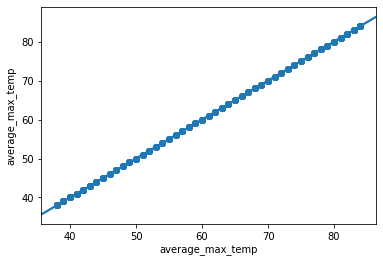

In [5]:
sns.regplot(x = "average_max_temp", y = "average_max_temp", data = dataNYC)
sns.regplot(x = "average_max_temp", y = "average_max_temp", data = dataKCLT)

In [ ]:
#data has a linear relationship according to the graph above

In [ ]:
sns.regplot(x = "average_max_temp", y = "actual_max_temp", data = dataNYC)
plt.title("Relation between average and actual maximum temperature")
plt.xlabel("Average max temp in (F)")
plt.ylabel("Actual max temp (F)")

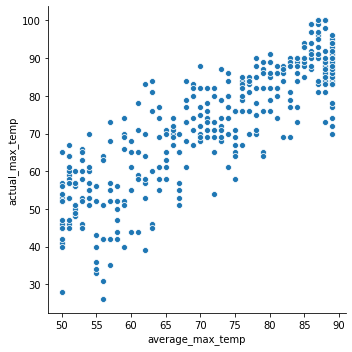

In [7]:
sns.relplot(x = "average_max_temp", y = "actual_max_temp", data = dataKCLT)

In [7]:
#question 1
#
lm = smf.ols("actual_max_temp ~ average_max_temp", data = dataNYC).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1776.
Date:                Sat, 12 Oct 2019   Prob (F-statistic):          7.37e-142
Time:                        22:39:59   Log-Likelihood:                -1277.0
No. Observations:                 365   AIC:                             2558.
Df Residuals:                     363   BIC:                             2566.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -6.7238      1.678     -4.007      0.000     -10.024      -3.424
average_max_temp     1.1027      0.026     42.137      0.000       1.051       1.154
==============================================================================
Omnibus:                        0.665   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.714
Skew:                           0.101   Prob(JB):                        0.700
Kurtosis:                       2.924   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Count')

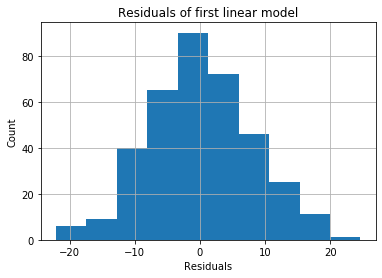

In [8]:
lm.resid.hist()
plt.title("Residuals of first linear model")
plt.xlabel("Residuals")
plt.ylabel("Count")

In [ ]:
#the distrubution appears to be normal because of the large variance in the center of the graph

In [10]:
char = pd.read_csv("KCLT.csv")
char.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65


In [28]:
dataNYC["charlotte_actual_max_temp"] = char["actual_max_temp"]

Text(0, 0.5, 'NYC actual maximum temperature (F)')

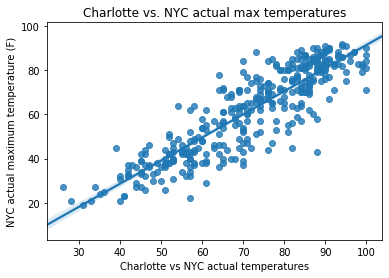

In [29]:
sns.regplot(x = "charlotte_actual_max_temp", y = "actual_max_temp", data = dataNYC)
plt.title("Charlotte vs. NYC actual max temperatures")
plt.xlabel("Charlotte vs NYC actual temperatures")
plt.ylabel("NYC actual maximum temperature (F)")

In [31]:
lm2 = smf.ols("actual_max_temp ~ charlotte_actual_max_temp", data = dataNYC).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1298.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          6.32e-122
Time:                        18:10:18   Log-Likelihood:                -1323.1
No. Observations:                 365   AIC:                             2650.
Df Residuals:                     363   BIC:                             2658.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -13.1209      2.132     -6.155      0.000     -17.313      -8.929
charlotte_actual_max_temp     1.0450      0.029     36.028      0.000       0.988       1.102
==============================================================================
Omnibus:                       13.704   Durbin-Watson:                   0.860
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.370
Skew:                          -0.393   Prob(JB):                     0.000460
Kurtosis:                       3.627   Cond. No.                         329.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#variance is 0.781

In [32]:
temps = pd.DataFrame({"charlotte_actual_max_temp":[32,60,80]})
temps

,charlotte_actual_max_temp
0,32
1,60
2,80


In [33]:
lm2.predict(temps)

0    20.319817
1    49.580479
2    70.480951
dtype: float64

Text(0, 0.5, 'Counts')

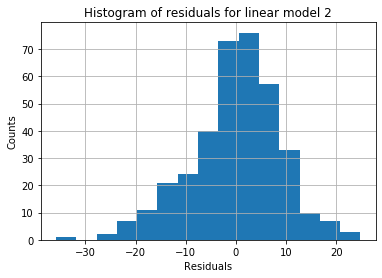

In [34]:
lm2.resid.hist(bins = 15)
plt.xlabel("Residuals")
plt.title("Histogram of residuals for linear model 2")
plt.ylabel("Counts")

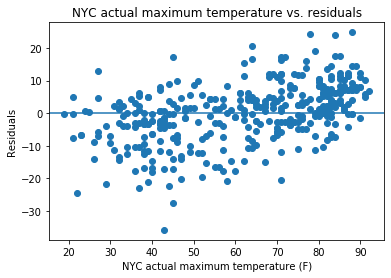

In [35]:
plt.scatter(x = dataNYC["actual_max_temp"], y = lm2.resid)
plt.title("NYC actual maximum temperature vs. residuals")
plt.ylabel("Residuals")
plt.xlabel("NYC actual maximum temperature (F)")
plt.axhline(0)

In [36]:
lm3 = smf.ols("actual_max_temp ~ charlotte_actual_max_temp + average_max_temp", data = dataNYC).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        actual_max_temp   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     1257.
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          1.19e-163
Time:                        21:27:12   Log-Likelihood:                -1222.4
No. Observations:                 365   AIC:                             2451.
Df Residuals:                     362   BIC:                             2462.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                   -15.0091      1.624     -9.242      0.000     -18.203     -11.815
charlotte_actual_max_temp     0.4680      0.042     11.235      0.000       0.386       0.550
average_max_temp              0.6962      0.043     16.328      0.000       0.612       0.780
==============================================================================
Omnibus:                        2.483   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.289   Jarque-Bera (JB):                2.568
Skew:                          -0.034   Prob(JB):                        0.277
Kurtosis:                       3.405   Cond. No.                         437.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# the variance is 0.874 according to this model

Text(0, 0.5, 'Counts')

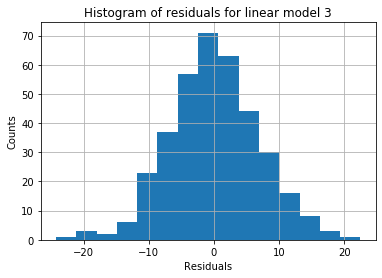

In [37]:
lm3.resid.hist(bins = 15)
plt.title("Histogram of residuals for linear model 3")
plt.xlabel("Residuals")
plt.ylabel("Counts")

In [ ]:
# the plot is centered around 70

Text(0, 0.5, 'Predicted actual max temperature (F)')

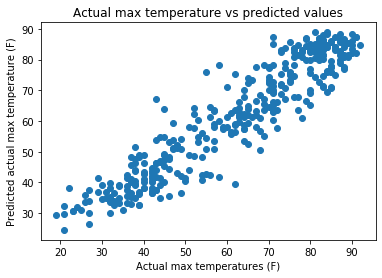

In [40]:
plt.scatter(x = dataNYC["actual_max_temp"], y = lm3.fittedvalues)
plt.title("Actual max temperature vs predicted values")
plt.xlabel("Actual max temperatures (F)")
plt.ylabel("Predicted actual max temperature (F)")